# Machine learning program "Median House Value"


In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

print("Tensorflow version: "+tf.__version__)

2023-10-27 07:26:11.732880: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 07:26:11.732993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 07:26:11.754961: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 07:26:12.893557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow version: 2.14.0


## Datasets

In [2]:
ATT_FILE =   f"MedianHouseValuePreparedCleanAttributes.csv"
LABEL_FILE = f"MedianHouseValueOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)
label =      pd.read_csv(LABEL_FILE)

In [3]:
attributes.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.217131,-0.693943,0.411765,-0.939264,-0.887337,-0.909246,-0.892781,-0.775851,-1.000000
1,-0.693227,0.177471,-0.294118,-0.917951,-0.886716,-0.954483,-0.889492,-0.591592,1.000000
2,0.448207,-0.959617,0.372549,-0.830663,-0.800745,-0.893495,-0.795757,-0.558972,1.000000
3,0.290837,-0.708820,-0.411765,-0.876291,-0.859094,-0.943160,-0.843776,-0.487055,-1.000000
4,-0.400398,0.158342,-0.490196,-0.841854,-0.845748,-0.934135,-0.827660,-0.164687,-0.333333


In [4]:
label.head()

,"Cheap:[15.0, 141.3]","Averaged:[141.4, 230.2]","Expensive:[230.3, 500.0]"
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [5]:
TRAIN_RATIO = 0.8

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATIO)
n_dev = int((n_instances - n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]
x_dev =   attributes.values[n_train:n_train + n_dev]
t_dev =   label.values[n_train:n_train + n_dev]

INPUTS =  x_train.shape[1]
OUTPUTS = t_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES =      int(round(x_dev.shape[0]/1))

print ("Number of training examples: ", NUM_TRAINING_EXAMPLES)
print ("Number of examples for development test: ", NUM_DEV_EXAMPLES)

Number of training examples:  16342
Number of examples for development test:  2043


## Model


In [125]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

In [126]:
model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

In [127]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              metrics=["categorical_accuracy"])


## Training

In [128]:
n_epochs = 1000
batch_size = 512
start_time = time.perf_counter()

In [129]:
history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs=n_epochs,
                    verbose = 0,
                    validation_data = (x_dev, t_dev))

## Results

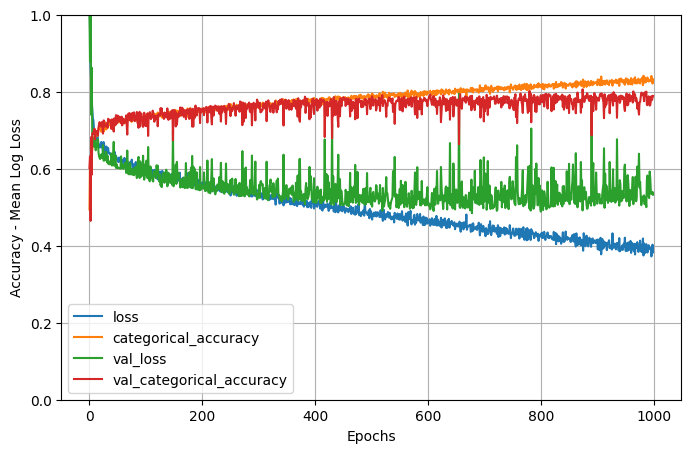

In [130]:
training_history = pd.DataFrame(history.history)
training_history.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

In [131]:
print ("Error (training): ",
       round((1 - training_history.categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Error (development test): ",
       round((1 - training_history.val_categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Time: ",
       round((time.perf_counter() - start_time)),"seconds")

Error (training):  16.8 %
Error (development test):  21.1 %
Time:  422 seconds


## **Exercises**

### **Exercise 1.**
Performance evaluation  Determine the following values: train error, test error (using dev set), bias, variance and training time. Repeat the execution at least three times. Consider 5% as Bayesian error (human error).

In [132]:
human_error = 5
train_errors = [17.7, 9.5, 2.5]
test_errors = [20.2, 21.0, 20.9]
training_times = [203, 1660, 155]
bias = [ e - human_error for e in train_errors]
variance = [e - train_errors[i] for i, e in enumerate(test_errors)]

data = {
    "train error" : train_errors,
    "test error": test_errors,
    "bias":bias,
    "variance":variance,
    'training time (s)': training_times
    }

values = pd.DataFrame(data)
values

,train error,test error,bias,variance,training time (s)
0,17.7,20.2,12.7,2.5,203
1,9.5,21.0,4.5,11.5,1660
2,2.5,20.9,-2.5,18.4,155


### **Exercise 2:**
Changing basic hyperparameters  Change hyperparameters related to: batch size, number of layers, and number of neurons. Estimate train error, test error, bias, variance and training time. Consider 5% as Bayesian error (human error).

#### **Change the batch size**

In [209]:
import glob
import pickle

from pydantic import BaseModel
import typing

class ResultsModel(BaseModel):
      batch_size: typing.Optional[int] = 0
      n: typing.Optional[float] = 0
      train_error: typing.Optional[float] = 0
      test_error: typing.Optional[float] = 0
      bias: typing.Optional[float] = 0
      variance: typing.Optional[float] = 0
      total_time: float
      history: typing.Any
      layer: typing.Optional[list] = []
      activation_function: typing.Optional[str] = None

class ResultsManager:
  def __init__(self, base_path: str, prefix: str,  human_error: int =5):
    self.human_error = human_error
    self.base_path = base_path
    self.prefix = prefix

  def save_result(self,file_name: str, results_model: ResultsModel):
    if not isinstance(data, dict):
        raise Exception("Data is not a dictionary")
    with open(f'{self.base_path}{file_name}', 'wb') as fp:
        pickle.dump(results_model, fp)

  def get_result(self, file_name: str) -> ResultsModel:
    with open(file_name, 'rb') as fp:
        data = pickle.load(fp)
        data['history'] = pd.DataFrame(data['history'])
        return ResultsModel(**data)

  def calculate_parameters(self, file_name: str):
    data = self.get_result(file_name)
    train_error = round((1 - data.history.categorical_accuracy.values[-1:][0])*100, 1)
    test_error = round((1 - data.history.val_categorical_accuracy.values[-1:][0])*100, 1)
    bias = train_error - self.human_error
    variance = test_error - train_error
    n = (n_train/batch_size) *n_epochs

    data.train_error = train_error
    data.test_error = test_error
    data.bias = bias
    data.variance = variance
    data.n = n

    return data


  def get_all_logs_names(self):
    file_names = glob.glob(f'{self.base_path}{self.prefix}*')
    return file_names

  def get_all_results(self):
    self.results = list()
    for log_name in self.get_all_logs_names():
      self.results.append(self.calculate_parameters(log_name))

    data = {
          "batch size": [r.batch_size for r in self.results],
          "N":[r.n for r in self.results],
          "train error" : [r.train_error for r in self.results],
          "test error": [r.test_error for r in self.results],
          "bias":[r.bias for r in self.results],
          "variance":[r.variance for r in self.results],
          'training time (s)': [r.total_time for r in self.results],
          "layer": [r.layer for r in self.results],
          "activation_function": [r.activation_function for r in self.results]
          }

    values = pd.DataFrame(data)
    return values.sort_values(by=['batch size'], ascending=False)

  def plot_results(self):
      fig = plt.figure(figsize=(25, 50))

      self.results.sort(key=lambda r: r.batch_size)

      for i, result in enumerate(self.results):
        ax = fig.add_subplot(len(self.results), 2, i+1)
        result.history.plot(ax=ax)
        ax.grid(True)
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Accuracy - Mean Log Loss")
        ax.set_title(f"Batch size: {result.batch_size}, layer: {result.layer}, activation_function: {result.activation_function}")
        ax.set_ylim(0, 1)
      plt.tight_layout()
      plt.show()

def calc_time(start_time):
  total_time = round((time.perf_counter() - start_time))
  return total_time



In [17]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
batch_sizes = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16342]
learning_rate = 0.1
n_epochs = 1000

models = list()

for batch_size in batch_sizes:
  model = keras.Sequential(name="my_model")

  model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
  for neurons in n_neurons_per_hidden_layer:
    model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                metrics=["categorical_accuracy"])
  models.append(model)

In [18]:
LOG_PREFIX = "batch_size_"

rm = ResultsManager(base_path='exercise2/batch_size/', prefix=LOG_PREFIX)

data = dict()

for index, batch_size in enumerate(batch_sizes):
  start_time = time.perf_counter()

  history = models[index].fit(x_train, t_train,
                      batch_size = batch_size,
                      epochs=n_epochs,
                      verbose = 0,
                      validation_data = (x_dev, t_dev))

  total_time = calc_time(start_time)

  data = {
   'history': history.history,
   'batch_size': batch_size,
   'total_time': total_time,
   'n_epochs': n_epochs
  }
  rm.save_result(f"{LOG_PREFIX}{batch_size}", data)



In [196]:
rm.get_all_results()

,batch size,N,train error,test error,bias,variance,training time (s),layer
0,512,31917.96875,15.0,21.8,10.0,6.8,732.0,"[1000, 500, 250, 75, 25]"
1,512,31917.96875,21.7,23.7,16.7,2.0,383.0,"[75, 25]"
2,512,31917.96875,24.7,27.5,19.7,2.8,366.0,[25]
3,512,31917.96875,21.0,23.0,16.0,2.0,400.0,"[250, 75, 25]"
4,512,31917.96875,16.6,26.4,11.6,9.8,470.0,"[500, 250, 75, 25]"


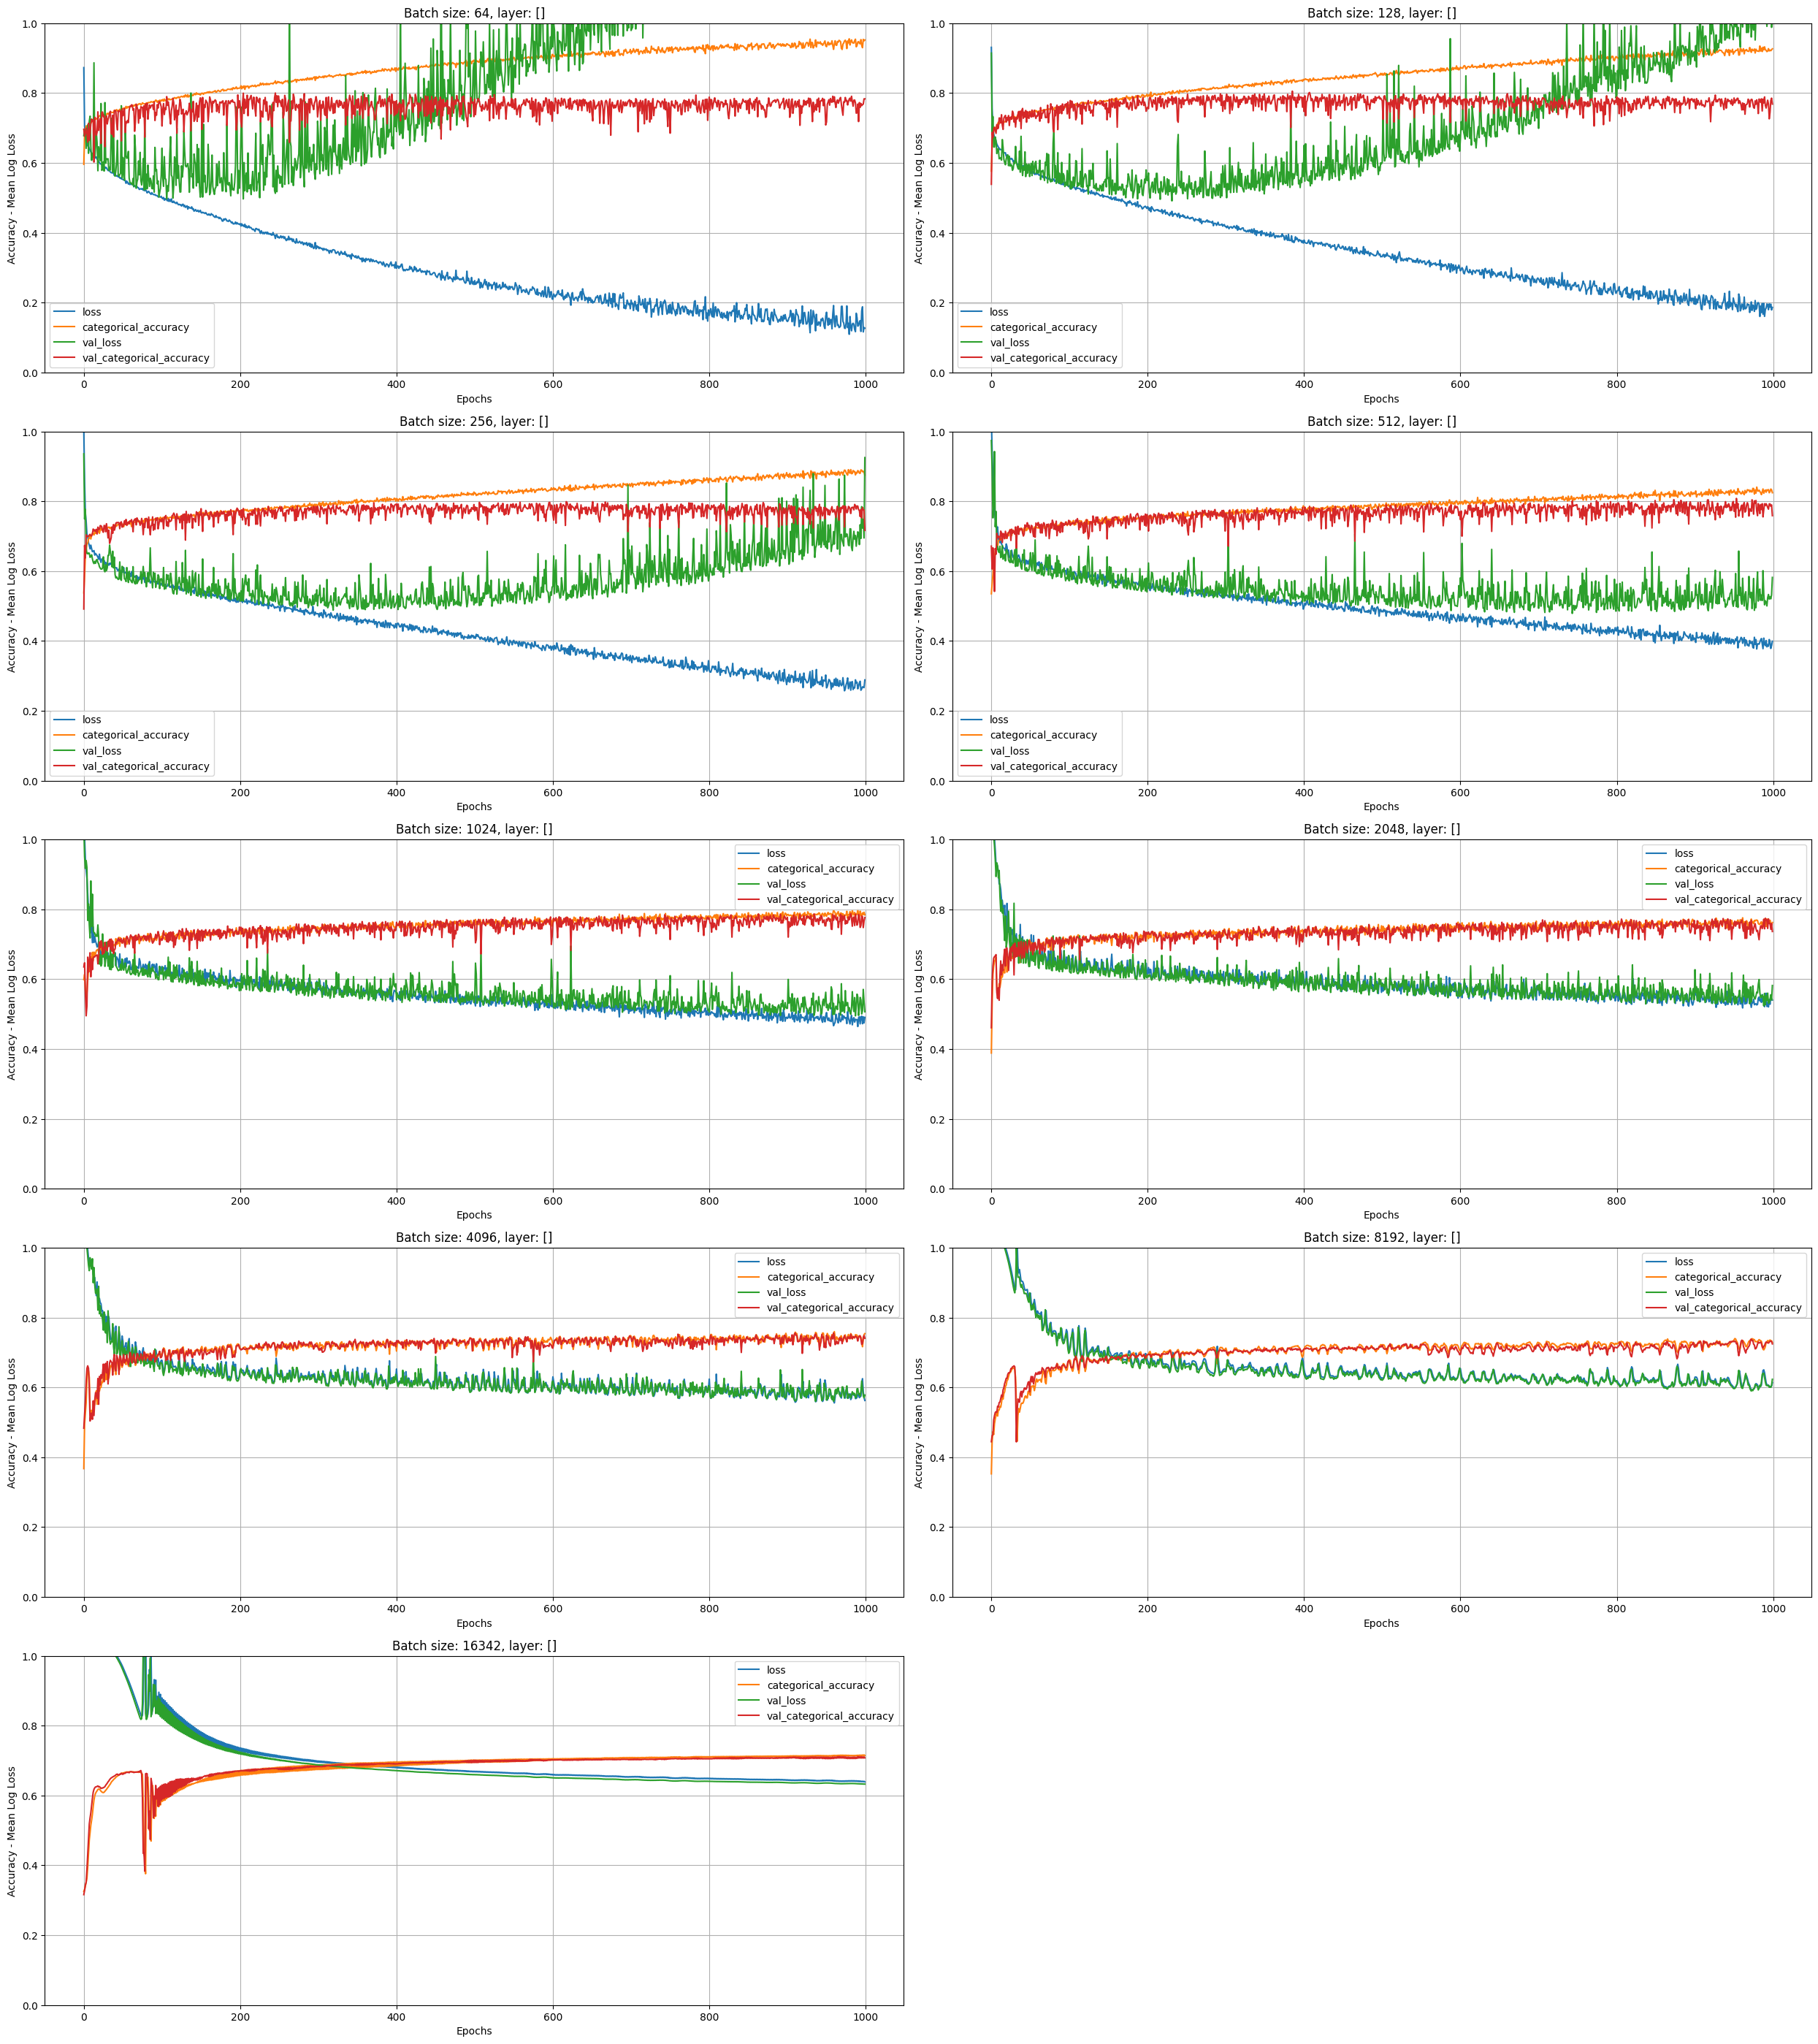

In [189]:
rm.plot_results()

#### **Change the number of layers**

In [74]:
n_neurons_per_hidden_layers = [
    [1000, 500, 250, 75, 25],
    [500, 250, 75, 25],
    [250, 75, 25],
    [75, 25],
    [25],
]
batch_size = 512
learning_rate = 0.1
n_epochs = 1000

models = list()

for layers in n_neurons_per_hidden_layers:
  model = keras.Sequential(name="my_model")

  model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
  for neurons in layers:
    model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                metrics=["categorical_accuracy"])
  models.append(model)

In [192]:
LOG_PREFIX = "layer_size_"

rm = ResultsManager(base_path='exercise2/layer_size/', prefix=LOG_PREFIX)

data = dict()

for index, layer in enumerate(n_neurons_per_hidden_layers):
  start_time = time.perf_counter()

  history = models[index].fit(x_train, t_train,
                      batch_size = batch_size,
                      epochs=n_epochs,
                      verbose = 0,
                      validation_data = (x_dev, t_dev))

  total_time = calc_time(start_time)

  data = {
   'history': history.history,
   'batch_size': batch_size,
   'total_time': total_time,
   'n_epochs': n_epochs,
   'layer': layer
  }
  rm.save_result(f"{LOG_PREFIX}{str(layer)}", data)


In [193]:
rm.get_all_results()

,batch size,N,train error,test error,bias,variance,training time (s),layer
0,512,31917.96875,15.0,21.8,10.0,6.8,732.0,"[1000, 500, 250, 75, 25]"
1,512,31917.96875,21.7,23.7,16.7,2.0,383.0,"[75, 25]"
2,512,31917.96875,24.7,27.5,19.7,2.8,366.0,[25]
3,512,31917.96875,21.0,23.0,16.0,2.0,400.0,"[250, 75, 25]"
4,512,31917.96875,16.6,26.4,11.6,9.8,470.0,"[500, 250, 75, 25]"


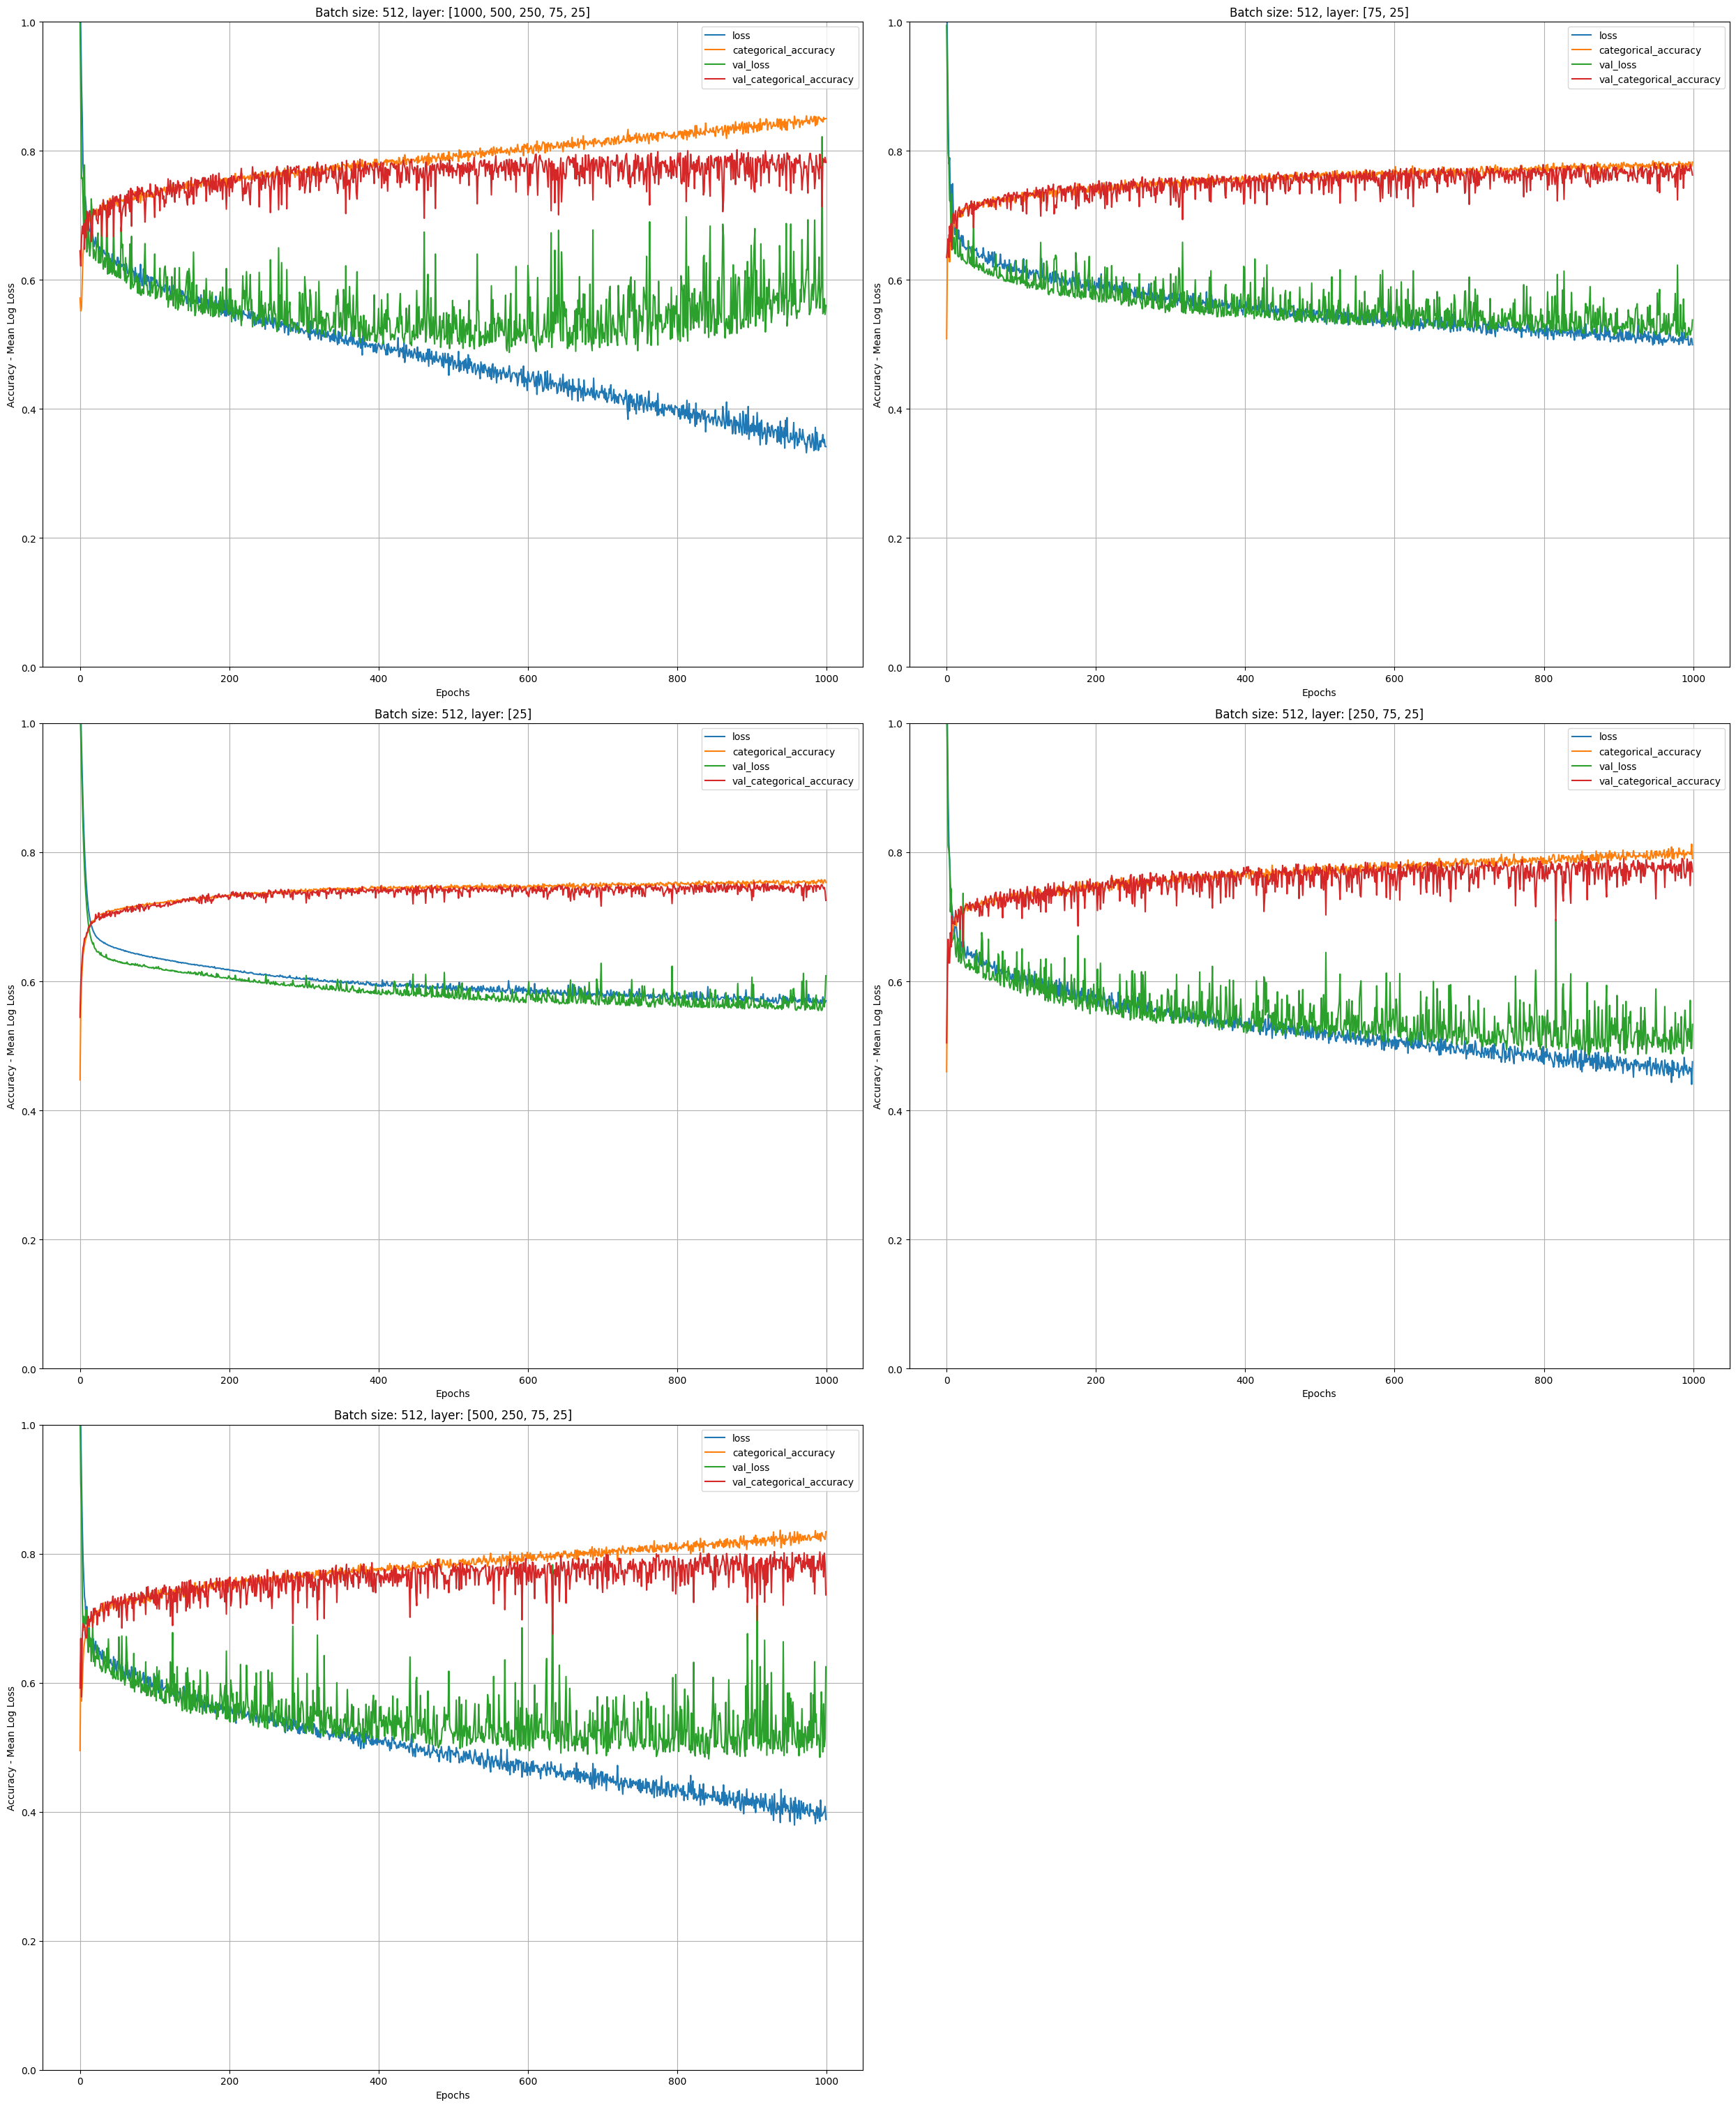

In [197]:
rm.plot_results()

## Exercise 3: Changing activation functions 
 
Change the activation function in the following part of the code: 
 
```
for neurons in n_neurons_per_hlayer: 
   model.add(keras.layers.Dense(neurons, activation="relu") 
```
Possible activation functions: elu, relu, tanh, linear 

In [200]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
activation_functions = ["elu", "relu", "tanh", "sigmoid", "softmax"]
batch_size = 512
learning_rate = 0.1
n_epochs = 1000

models = list()

for activation_function in activation_functions:
  model = keras.Sequential(name="my_model")

  model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
  for neurons in n_neurons_per_hidden_layer:
    model.add(keras.layers.Dense(neurons, activation=activation_function))
  model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                metrics=["categorical_accuracy"])
  models.append(model)

In [219]:
LOG_PREFIX = "activation_function_"

rm = ResultsManager(base_path='exercise3/', prefix=LOG_PREFIX)

data = dict()

for index, activation_function in enumerate(activation_functions):
  start_time = time.perf_counter()

  history = models[index].fit(x_train, t_train,
                      batch_size = batch_size,
                      epochs=n_epochs,
                      verbose = 0,
                      validation_data = (x_dev, t_dev))

  total_time = calc_time(start_time)

  data = {
   'history': history.history,
   'batch_size': batch_size,
   'total_time': total_time,
   'n_epochs': n_epochs,
   'layer': n_neurons_per_hidden_layer,
   'activation_function': activation_function
  }
  rm.save_result(f"{LOG_PREFIX}{str(layer)}", data)

In [221]:
rm.get_all_results()

,batch size,N,train error,test error,bias,variance,training time (s),layer,activation_function
0,512,31.917969,32.7,32.7,27.7,0.0,1.0,"[500, 250, 75, 25]",elu


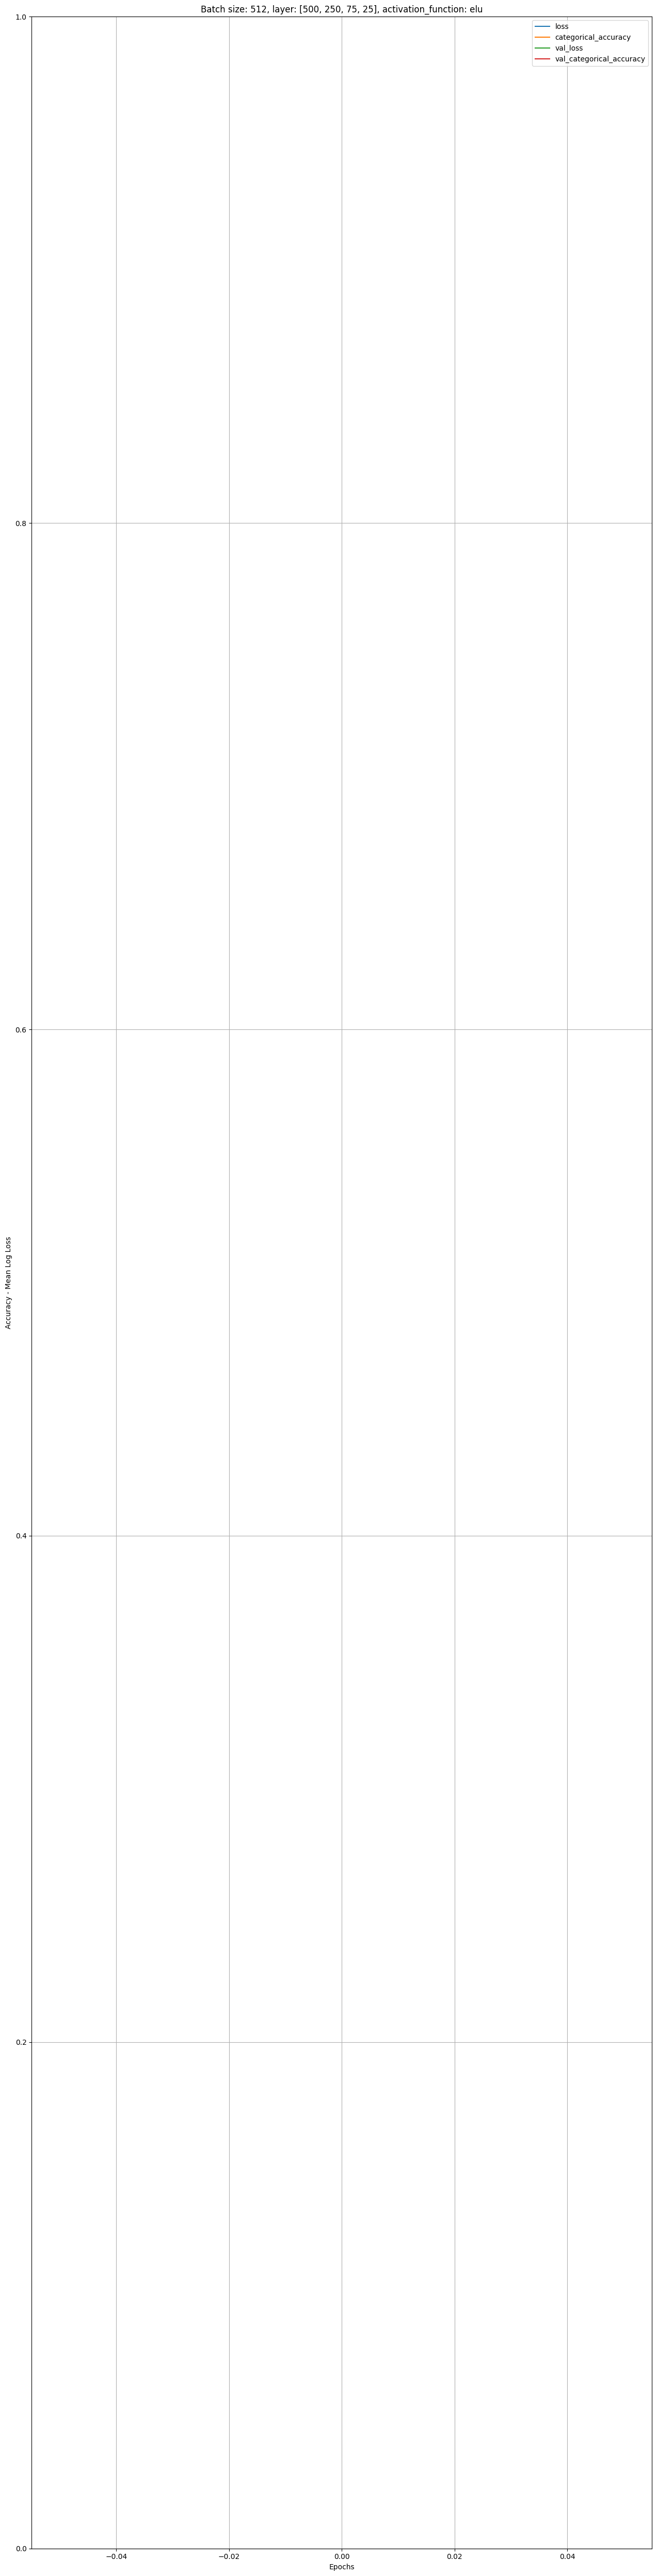

In [215]:
rm.plot_results()